# [원격연결](https://www.youtube.com/watch?v=ByHBsmaTWgU), [원격부팅](https://extrememanual.net/8469)  

teamviewer로 세션 안죽이고 원격조정해서 서버 이용가능   

validation set은 error값 변형에 영향을 안 미친다.   
따라서 test data 넣어도 된다. 매 epoch마다 성능을 보고싶어서 사용한다.   

hyt1611@naver.com 과제 제출  

gpu 2개 박으면 각 gpu마다 hyper-parameter 달리해서 학습시켜서 결과를 얻어냄  
2개에 하나의 학습을 빨리할 수 없다. (오히려 느려짐)  

특정 합성곱 층에서 추출한 표현의 일반성(그리고 재사용성)의 수준은 모델에
있는 층의 깊이에 달려 있습니다. == 깊을수록 일반성이 높다.

Autoencoder : 특징만 추출해냄 : compressed representation

autoencoder는 data-specific 합니다. autoencoder는 이제껏 훈련된 데이터와
비슷한 데이터로만 압축될 수 있습니다 : 모델은 학습한 데이터의 카테고리에서만 사용할 수 있다.

autoencoder 사용하는 이유  
1. 차원을 줄여서 연산량을 줄이기 위해서(압축용도)
2. noise 제거

two minute papers 

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 한 픽셀값이 가질 수 있는 값이므로 0~1로 바꿔줌
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

W0712 12:27:08.895329 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 12:27:08.915812 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 12:27:08.919958 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

W0712 12:27:08.990094 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 12:27:09.013048 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 12:27:09.019709 140125261420416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

W0712 12:27:09.561400 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



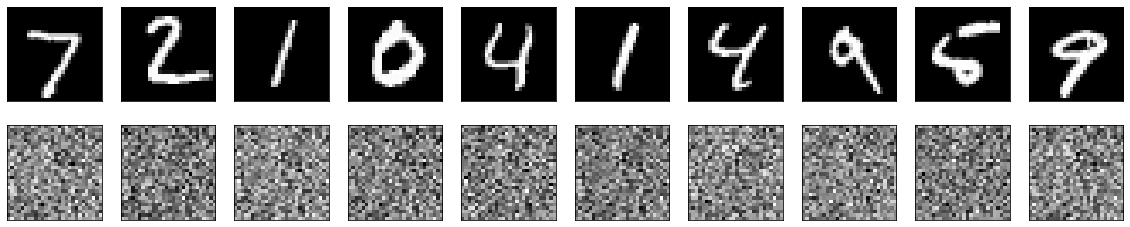

In [0]:
import matplotlib.pyplot as plt

n = 10
# 1차원으로 축소시키고 복원시켜서
# 공간 정보를 잃어버린다. => 손실되는 부분이 많다.
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(784,))
# Dense(128, activation='relu')(input_img) matrix곱하기처럼 보임
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
# 성능이 안좋다...
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=100, 
                batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.3326 - val_loss: 0.2621
Epoch 2/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.2545 - val_loss: 0.2439
Epoch 3/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.2323 - val_loss: 0.2240
Epoch 4/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.2189 - val_loss: 0.2131
Epoch 5/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.2072 - val_loss: 0.1990
Epoch 6/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2006 - val_loss: 0.2310
Epoch 7/100
60000/60000 [==============================] - 6s 94us/step - loss: 2.9286 - val_loss: 3.1053
Epoch 8/100
60000/60000 [==============================] - 6s 96us/step - loss: 1.1736 - val_loss: 0.6462
Epoch 9/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.6263 - val_loss: 0.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


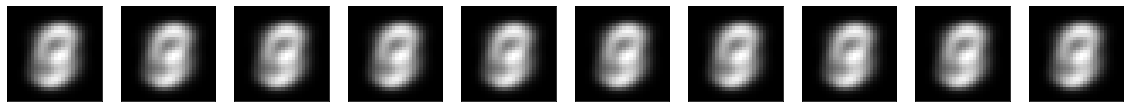

In [0]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)

# 결국에는 입력과 출력값을 비교하기 위해서 필터 하나만 써서 복원한다.
# 만약 컬러사진이라면 3개 필터를 써야겠지
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0712 12:36:46.837331 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 12:36:46.892314 140125261420416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [0]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, \
                shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.5766 - val_loss: 0.4997
Epoch 2/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.4465 - val_loss: 0.4130
Epoch 3/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3964 - val_loss: 0.3920
Epoch 4/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3878 - val_loss: 0.3911
Epoch 5/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3876 - val_loss: 0.3911
Epoch 6/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3876 - val_loss: 0.3912
Epoch 7/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3876 - val_loss: 0.3912
Epoch 8/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3876 - val_loss: 0.3912
Epoch 9/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3876 - val_loss: 0.3912
Epoch

In [0]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

[What's the difference between a Variational Autoencoder (VAE) and an Autoencoder?](https://www.quora.com/Whats-the-difference-between-a-Variational-Autoencoder-VAE-and-an-Autoencoder)

autoencoder : 자기 자신을 입력해서 자기 자신을 학습함

variational autoencoder : 입력에 변형이 있어서(잡음) 변형을 제거하고 원본 복원하는 과정  
== autoencoder와 달리 noise가 있어도 원본을 추출할 수 있다.

np.clip 범위내의 숫자값으로 자름  

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [0]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)

# 결국에는 입력과 출력값을 비교하기 위해서 필터 하나만 써서 복원한다.
# 만약 컬러사진이라면 3개 필터를 써야겠지
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100, batch_size=128,
                shuffle=True, validation_data=(x_test_noisy, x_test))

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

[데이터 저장 format](https://www.h5py.org/)  
R-CNN의 단점 : 다른 사이즈의 bounding box를 같은 크기로 축소시킴 